In [1]:
# Import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Read the data

df = pd.read_csv("/content/Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
# display first 5 rows

df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
# display last 5 rows

df.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [5]:
# statistical information of the data

df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
# information of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
# number of rows and columns

df.shape

(600, 6)

In [8]:
# missing values

df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [9]:
# column names

df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [15]:
# skewness

df.skew()

Taxable.Income     0.030015
City.Population    0.125009
Work.Experience    0.018529
dtype: float64

In [16]:
# Kurtosis

df.kurt()

Taxable.Income    -1.199782
City.Population   -1.120154
Work.Experience   -1.167524
dtype: float64

In [12]:
# Valuecounts

df.value_counts()

Undergrad  Marital.Status  Taxable.Income  City.Population  Work.Experience  Urban
NO         Divorced        10329           140885           7                YES      1
YES        Married         21966           117250           20               YES      1
                           26679           79683            26               NO       1
                           26741           176050           20               NO       1
                           26793           162777           7                NO       1
                                                                                     ..
NO         Single          22054           91889            16               NO       1
                           22258           63622            17               NO       1
                           23884           111105           8                YES      1
                           24557           32450            19               YES      1
YES        Single          99619     

In [13]:
# Correlation

df.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [18]:
# maintain copy of df

df1 = df.copy()
df1['Taxable_cat'] = pd.cut(x = df1['Taxable.Income'], bins = [10002,30000,99620], labels=['Risky','Good'], right = False)
df1["Taxable_cat"].value_counts()


Good     476
Risky    124
Name: Taxable_cat, dtype: int64

In [19]:
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_cat
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


# Visualisation


<Axes: >

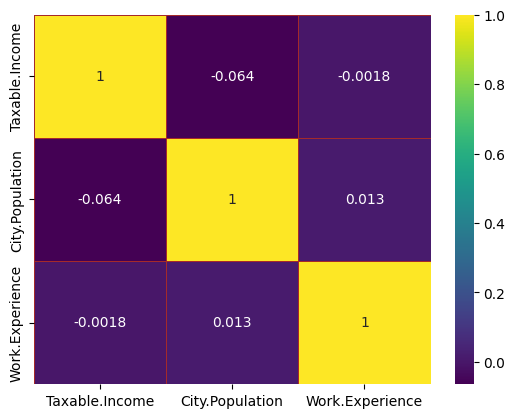

In [20]:
# heatmap

sns.heatmap(df.corr(), annot=True, fmt='.2g', cmap="viridis",  linewidths=0.5, linecolor='brown')

<Axes: xlabel='Work.Experience'>

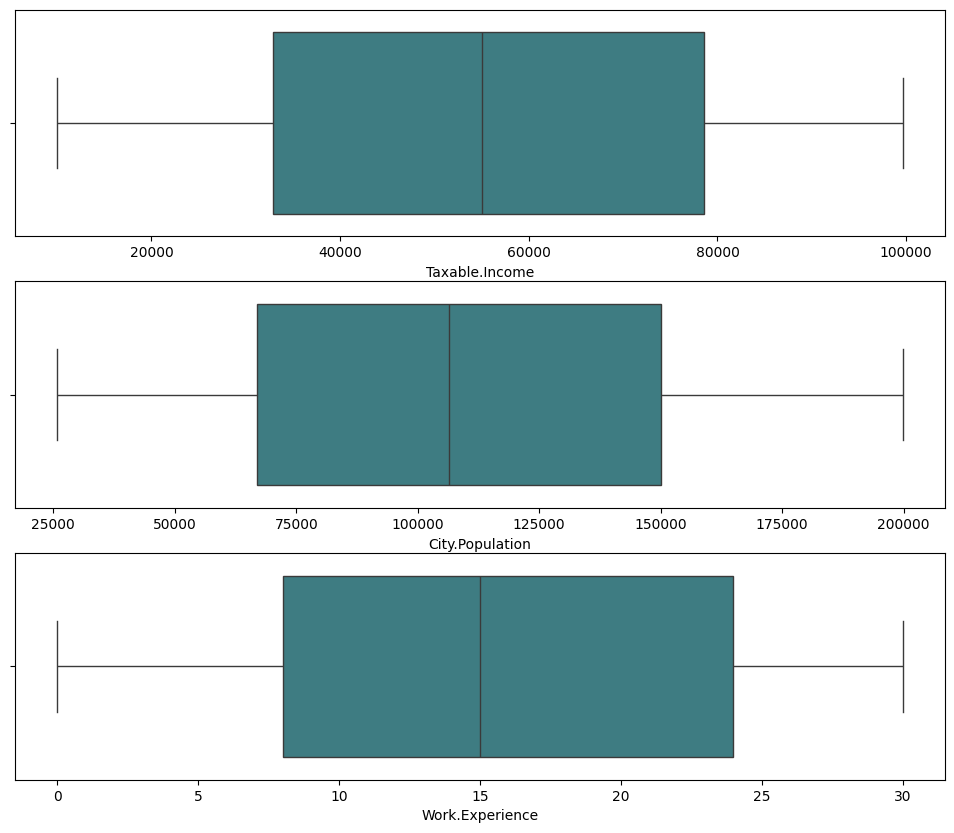

In [21]:
# Boxplots

bp=df1.copy()
fig, axes=plt.subplots(3,1,figsize=(12,10),sharex=False,sharey=False)
sns.boxplot(x='Taxable.Income',data=bp,palette='crest',ax=axes[0])
sns.boxplot(x="City.Population",data=bp,palette='crest',ax=axes[1])
sns.boxplot(x='Work.Experience',data=bp,palette='crest',ax=axes[2])

<Figure size 1000x1000 with 0 Axes>

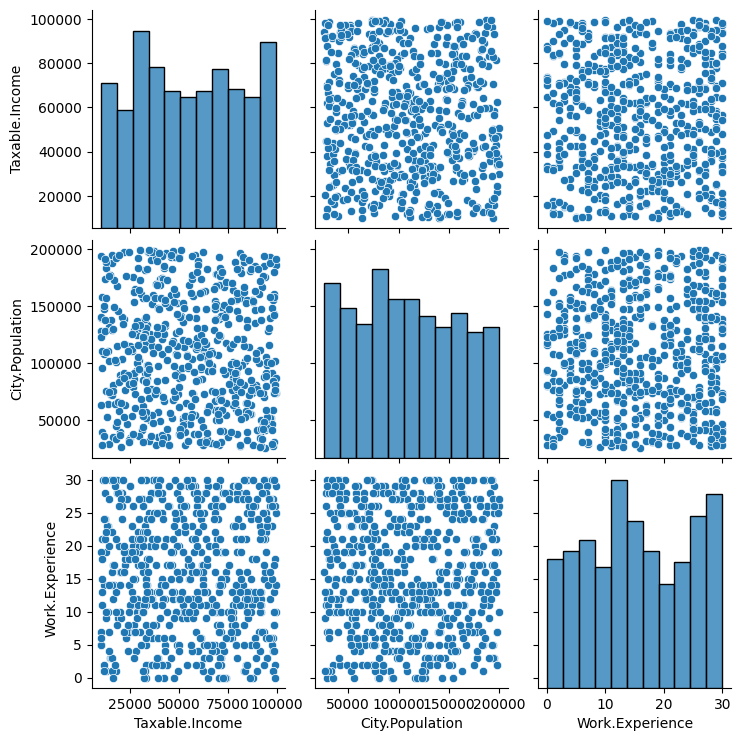

In [43]:
# Pairplot

plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.show()

Text(0.5, 1.0, 'Risky or Good for Individual Taxable Income ')

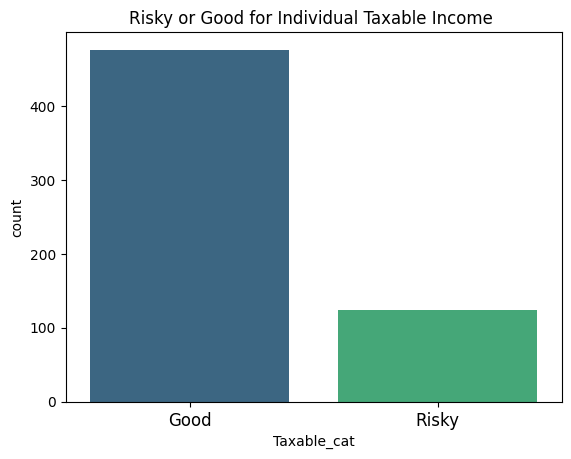

In [23]:
# Countplots

sns.countplot(x='Taxable_cat', data=df1, palette = 'viridis',
              order=df1['Taxable_cat'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Risky or Good for Individual Taxable Income ')

Text(0.5, 1.0, 'Marital Status ')

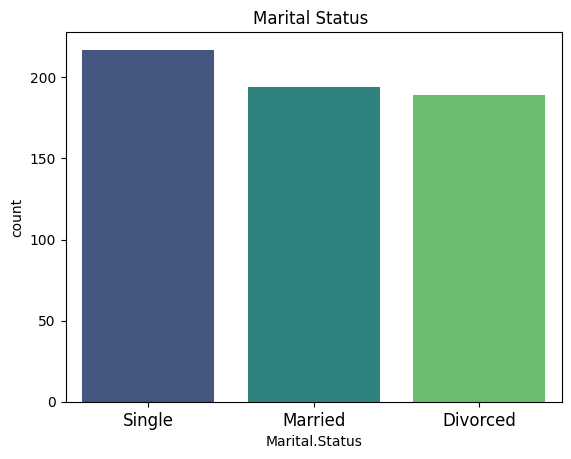

In [24]:
sns.countplot(x='Marital.Status', data=df1, palette = 'viridis',
              order=df1['Marital.Status'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Marital Status ')

Text(0.5, 1.0, 'Undergrad ')

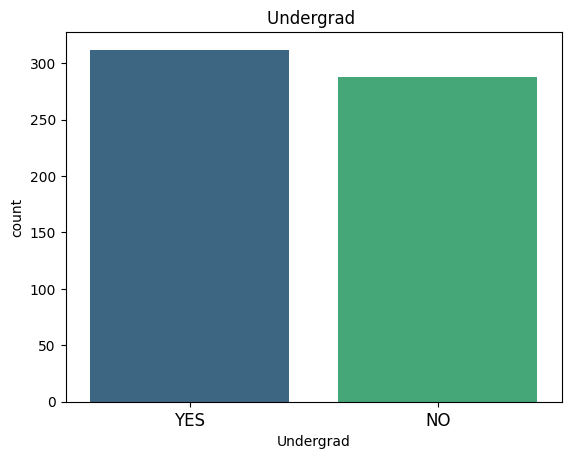

In [25]:
sns.countplot(x='Undergrad', data=df1, palette = 'viridis',
              order=df1['Undergrad'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Undergrad ')

Text(0.5, 1.0, 'Urban')

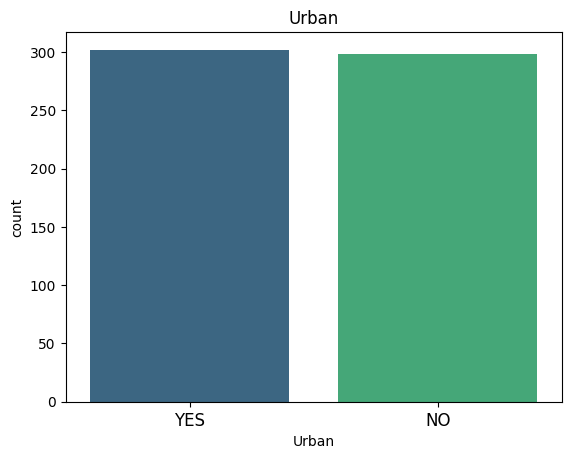

In [26]:
sns.countplot(x='Urban', data=df1, palette = 'viridis',
              order=df1['Urban'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Urban')

# Label Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

df1["Taxable_cat"]=LE.fit_transform(df1["Taxable_cat"])
df1["Urban"]=LE.fit_transform(df1["Urban"])
df1["Undergrad"]=LE.fit_transform(df1["Undergrad"])
df1["Marital.Status"]=LE.fit_transform(df1["Marital.Status"])

df1.drop('Taxable.Income', axis=1,inplace=True)

df1.head()


,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_cat
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [29]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score


In [30]:
# Independent and dependent features

X=df1.iloc[:,0:5]
Y=df1[["Taxable_cat"]]


In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.30)


DT = DecisionTreeClassifier(max_depth=4)

DT.fit(X_train,Y_train)
Y_pred_train = DT.predict(X_train)
Y_pred_test = DT.predict(X_test)
training_accuracy = accuracy_score(Y_train,Y_pred_train).round(3)
test_accuracy = accuracy_score(Y_test,Y_pred_test).round(3)

print(training_accuracy)
print(test_accuracy)

print("Number of Nodes",DT.tree_.node_count)
print("Level of Depth",DT.tree_.max_depth)

0.795
0.806
Number of Nodes 21
Level of Depth 4


In [32]:
# validaton hold-off method

training_accuracy = []
test_accuracy = []

DT = DecisionTreeClassifier(max_depth=1)


for i in range(1,101,1):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.30, random_state=i)
    DT.fit(X_train,Y_train)
    Y_pred_train = DT.predict(X_train)
    Y_pred_test = DT.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train).round(3))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test).round(3))


print("Average training accuray",np.mean(training_accuracy).round(2))
print("Average test accuray",np.mean(test_accuracy).round(2))

Average training accuray 0.79
Average test accuray 0.79


In [33]:
 clf_report = pd.DataFrame(classification_report(Y_train,Y_pred_train, output_dict=True))
 print(clf_report)

                    0     1  accuracy   macro avg  weighted avg
precision    0.792857   0.0  0.792857    0.396429      0.628622
recall       1.000000   0.0  0.792857    0.500000      0.792857
f1-score     0.884462   0.0  0.792857    0.442231      0.701252
support    333.000000  87.0  0.792857  420.000000    420.000000


In [34]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 200, max_samples = 0.6, max_features=0.7,max_depth=5)
RF.fit(X_train,Y_train)

Y_pred_train = RF.predict(X_train)
Y_pred_test = RF.predict(X_test)
training_accuracy = accuracy_score(Y_train,Y_pred_train).round(3)
test_accuracy = accuracy_score(Y_test,Y_pred_test).round(3)

print(training_accuracy)
print(test_accuracy)

0.793
0.794


In [36]:
# validation hold-off method

training_accuracy = []
test_accuracy = []

for i in range(1,101,1):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.30, random_state=i)
    RF.fit(X_train,Y_train)
    Y_pred_train = RF.predict(X_train)
    Y_pred_test = RF.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train).round(3))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test).round(3))


print("Average training accuray",np.mean(training_accuracy).round(2))
print("Average test accuray",np.mean(test_accuracy).round(2))

Average training accuray 0.8
Average test accuray 0.79


In [37]:
 clf_report = pd.DataFrame(classification_report(Y_train,Y_pred_train, output_dict=True))
 print(clf_report)

                    0          1  accuracy   macro avg  weighted avg
precision    0.796651   1.000000  0.797619    0.898325      0.838773
recall       1.000000   0.022989  0.797619    0.511494      0.797619
f1-score     0.886818   0.044944  0.797619    0.465881      0.712429
support    333.000000  87.000000  0.797619  420.000000    420.000000


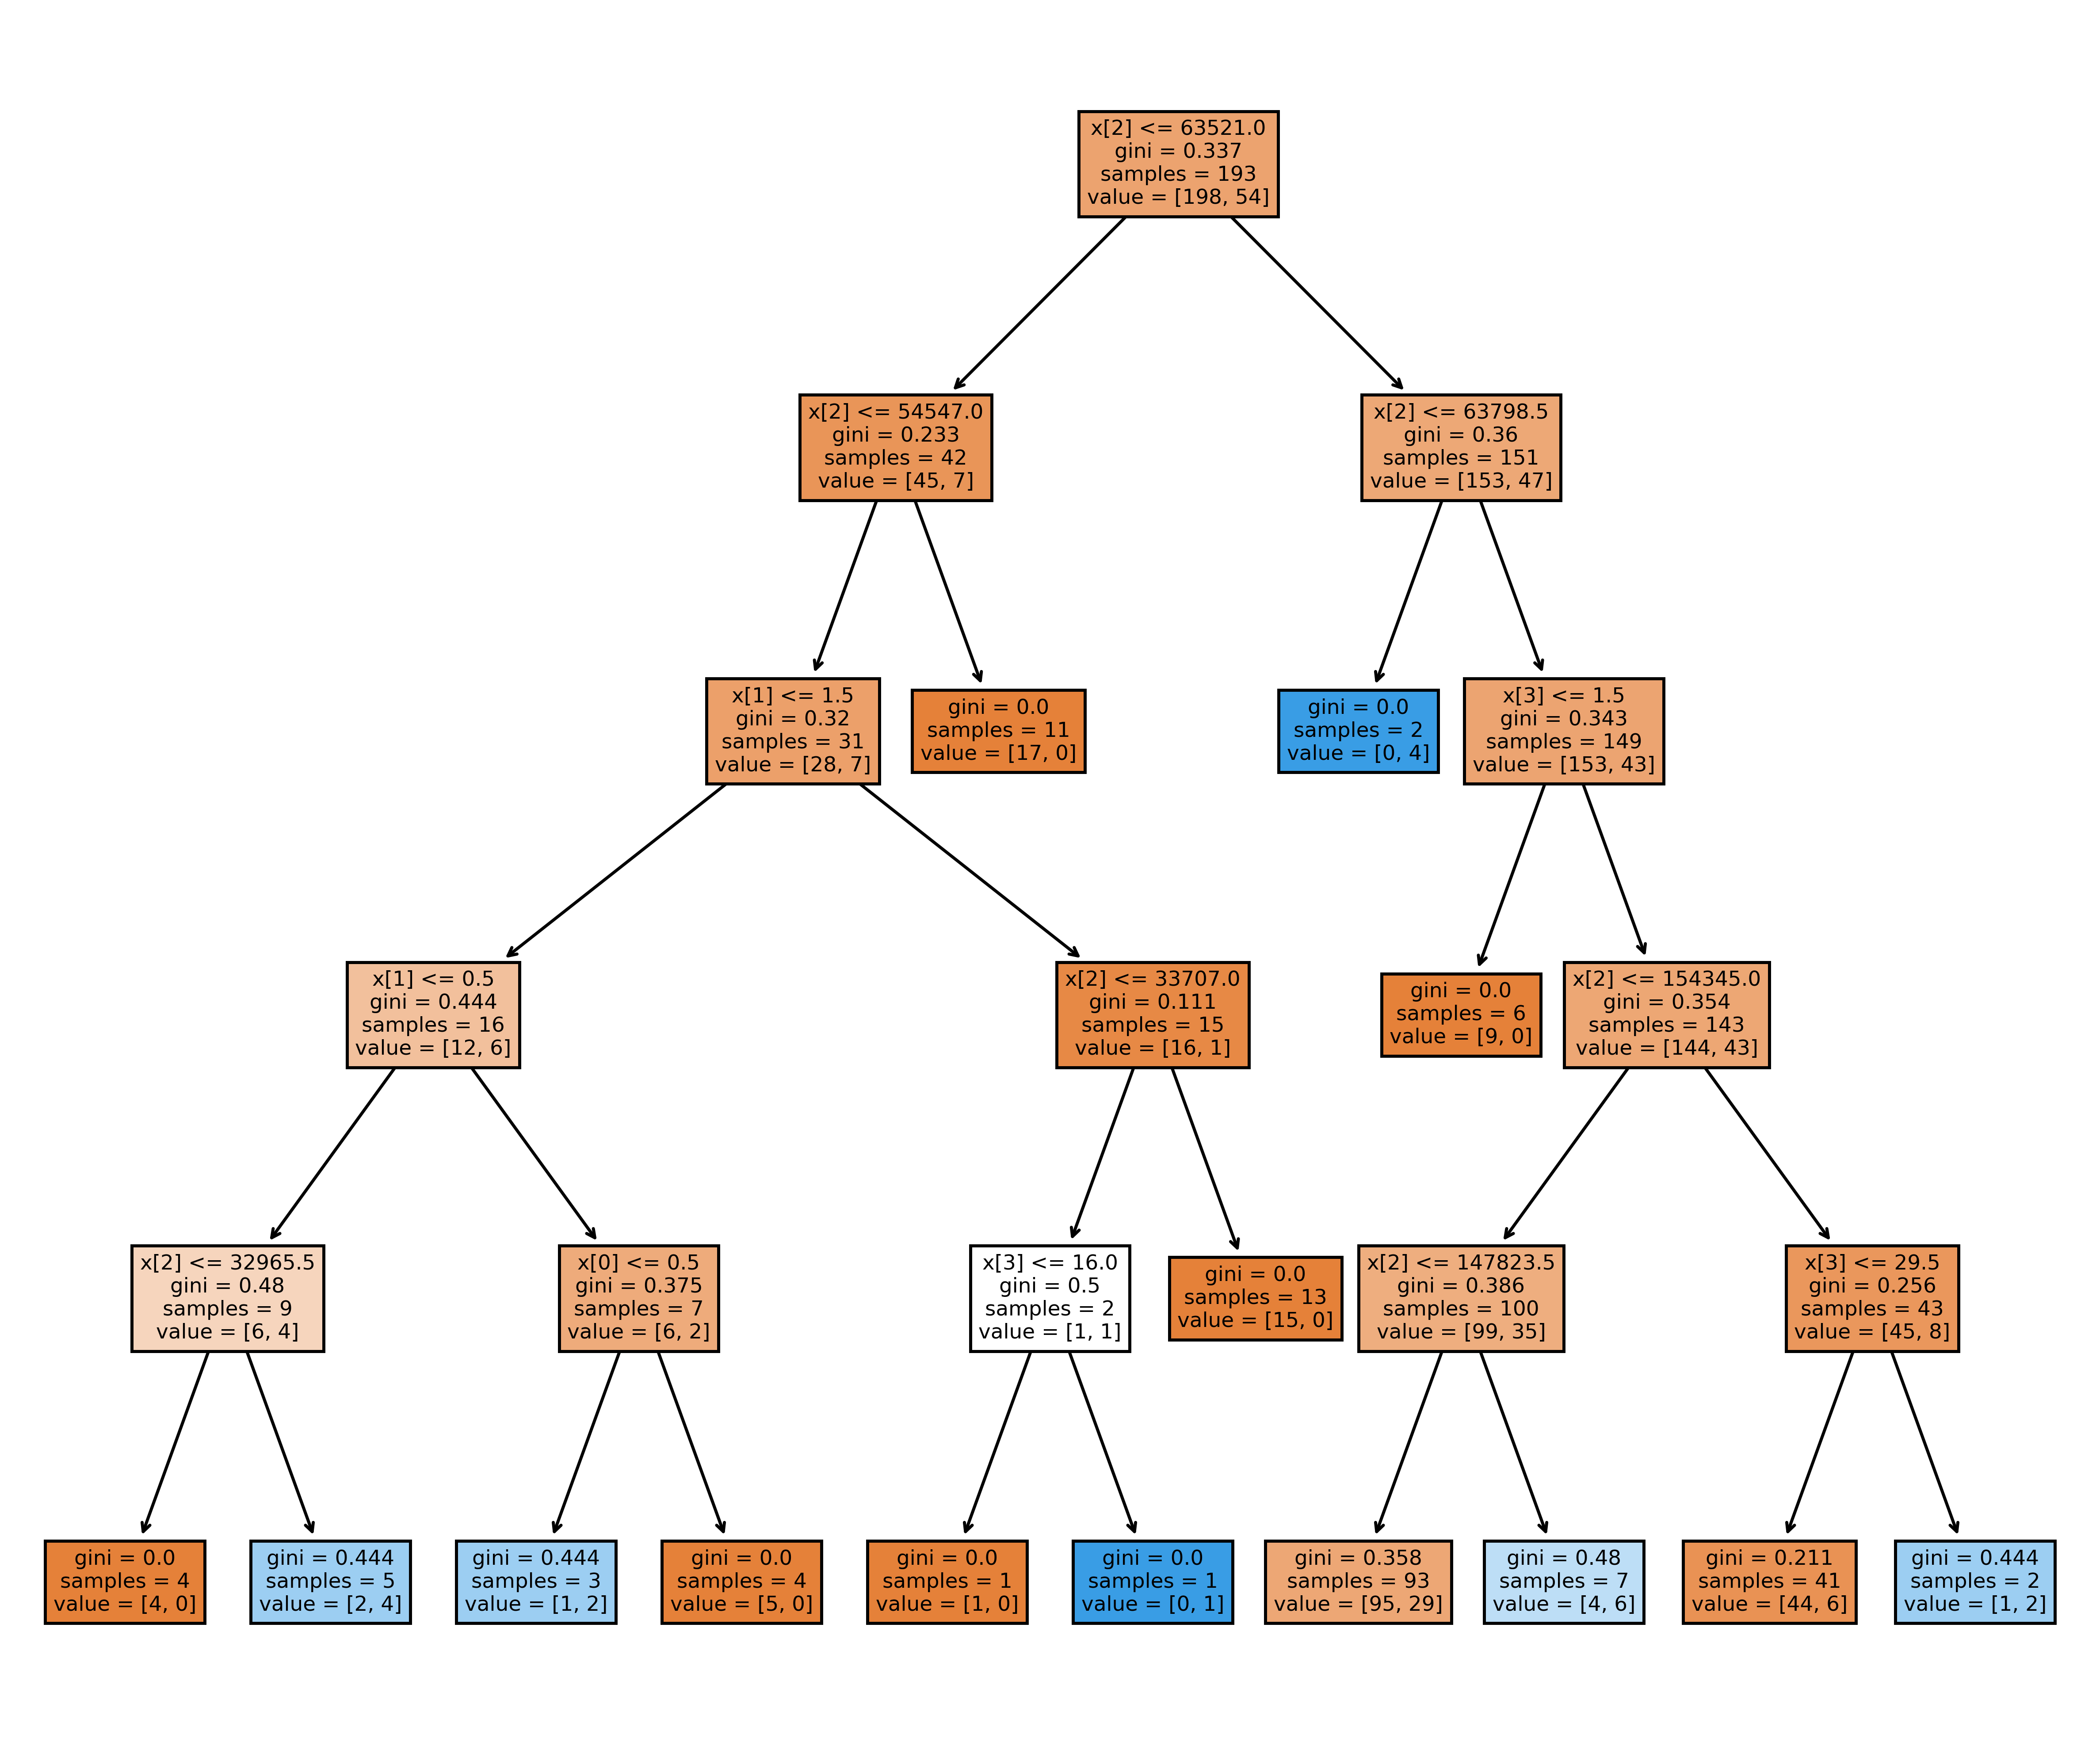

In [40]:
plt.figure(figsize=(12,10),dpi=500)
tree.plot_tree(RF.estimators_[190],filled=True)
plt.show()

In [42]:
RF.feature_importances_

array([0.04046784, 0.07705153, 0.5409503 , 0.29320629, 0.04832404])